In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.load('/fastio2/dasha/double_pulse/data.npy', mmap_mode='r')

In [3]:
weights = np.load('/fastio2/dasha/double_pulse/weights.npy', mmap_mode='r')

In [4]:
print(data.shape, weights.shape)

(1476948, 1) (6374299, 1)


In [5]:
data = data.reshape(data.shape[0])

In [6]:
#print(sum(data['weight']['NEvents'])/data.shape[0])

In [7]:
NFiles = 11999
EventsPerFile = 10000
index = -2.13 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 0.9e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux = flux_at_100tev*((data['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
w_flux = flux_at_100tev*((weights['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

# one weights has units of [GeV cm2 sr / Number of total simulated events]
d_weights = data['weight']['OneWeight']*d_flux/(NFiles*EventsPerFile) # units of Hz per simulated events event
w_weights = weights['weight']['OneWeight']*w_flux/(NFiles*EventsPerFile) # units of Hz per simulated events event

d_rate = np.sum(d_weights) # total rates in Hz
w_rate = np.sum(w_weights) # total rates in Hz

print(d_rate*livetime,w_rate*livetime)

16.294573635195217 68.11459153178455


Text(0.5, 0, 'log10(Muon Energy Proxy / GeV)')

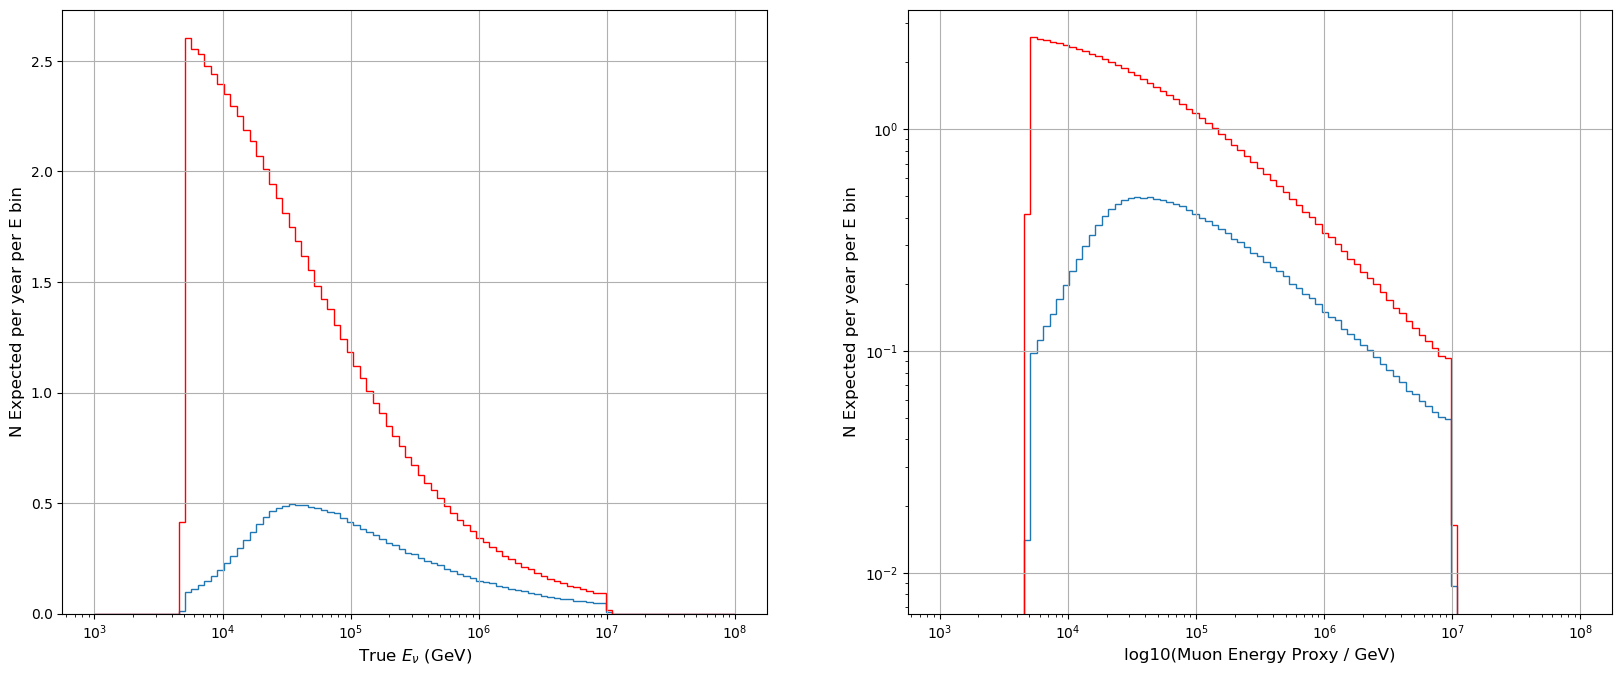

In [8]:
fig = plt.figure(dpi=100, figsize=(20,8))
ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)
plt.hist((data['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights*livetime, histtype='step', label ="after cuts")
plt.hist((weights['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights*livetime, histtype='step', color = 'r', label = "all")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights*livetime, histtype='step', label ="after cuts")
plt.hist((weights['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights*livetime, histtype='step', color = 'r', label = "all")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)

In [9]:
preds = np.load('/fastio2/dasha/double_pulse/preds_2.npy')
print(preds.shape)

(1476948, 1, 2)


In [10]:
preds = preds.reshape((preds.shape[0],2))
print(preds[0])

[0.08030367 0.91969633]


In [12]:
sz = data.shape[0]
mask_50 = (0.5 <= preds[:,1])
mask_70 = (0.7 <= preds[:,1])
mask_90 = (0.9 <= preds[:,1])
mask_100 = 1.0 == preds[:,1] 

print(len(data['weight'][mask_50])/sz*100,len(data['weight'][mask_70])/sz*100, len(data['weight'][mask_90])/sz*100, len(data['weight'][mask_100])/sz*100)
print(len(data['weight'][mask_50]), len(data['weight'][mask_70]), len(data['weight'][mask_90]), len(data['weight'][mask_100]))

57.791743514328196 27.798541316281955 13.60745266590293 2.852707068901546
853554 410570 200975 42133


In [13]:
NFiles = 11999
EventsPerFile = 10000
index = -2.13 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 0.9e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux = flux_at_100tev*((data['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_50 = flux_at_100tev*((data['weight'][mask_50]['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_70 = flux_at_100tev*((data['weight'][mask_70]['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_90 = flux_at_100tev*((data['weight'][mask_90]['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_100 = flux_at_100tev*((data['weight'][mask_100]['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

# one weights has units of [GeV cm2 sr / Number of total simulated events]
d_weights = data['weight']['OneWeight']*d_flux/(NFiles*EventsPerFile) # units of Hz per simulated events event
d_weights_50 = data['weight'][mask_50]['OneWeight']*d_flux_50/(NFiles*EventsPerFile) # units of Hz per simulated events event
d_weights_70 = data['weight'][mask_70]['OneWeight']*d_flux_70/(NFiles*EventsPerFile) # units of Hz per simulated events event
d_weights_90 = data['weight'][mask_90]['OneWeight']*d_flux_90/(NFiles*EventsPerFile) # units of Hz per simulated events event
d_weights_100 = data['weight'][mask_100]['OneWeight']*d_flux_100/(NFiles*EventsPerFile) # units of Hz per simulated events event

d_rate = np.sum(d_weights) # total rates in Hz
d_rate_50 = np.sum(d_weights_50) # total rates in Hz
d_rate_70 = np.sum(d_weights_70) # total rates in Hz
d_rate_90 = np.sum(d_weights_90) # total rates in Hz
d_rate_100 = np.sum(d_weights_100) # total rates in Hz

print("All(cut)", d_rate*livetime)
print("P>50", d_rate_50*livetime)
print("P>70", d_rate_70*livetime)
print("P>90", d_rate_90*livetime)
print("P=100", d_rate_100*livetime)

All(cut) 16.294573635195217
P>50 6.996197471929034
P>70 3.0455917953316907
P>90 1.3948745726348581
P=100 0.25332777842517856


Text(0.5, 0, 'log10(Muon Energy Proxy / GeV)')

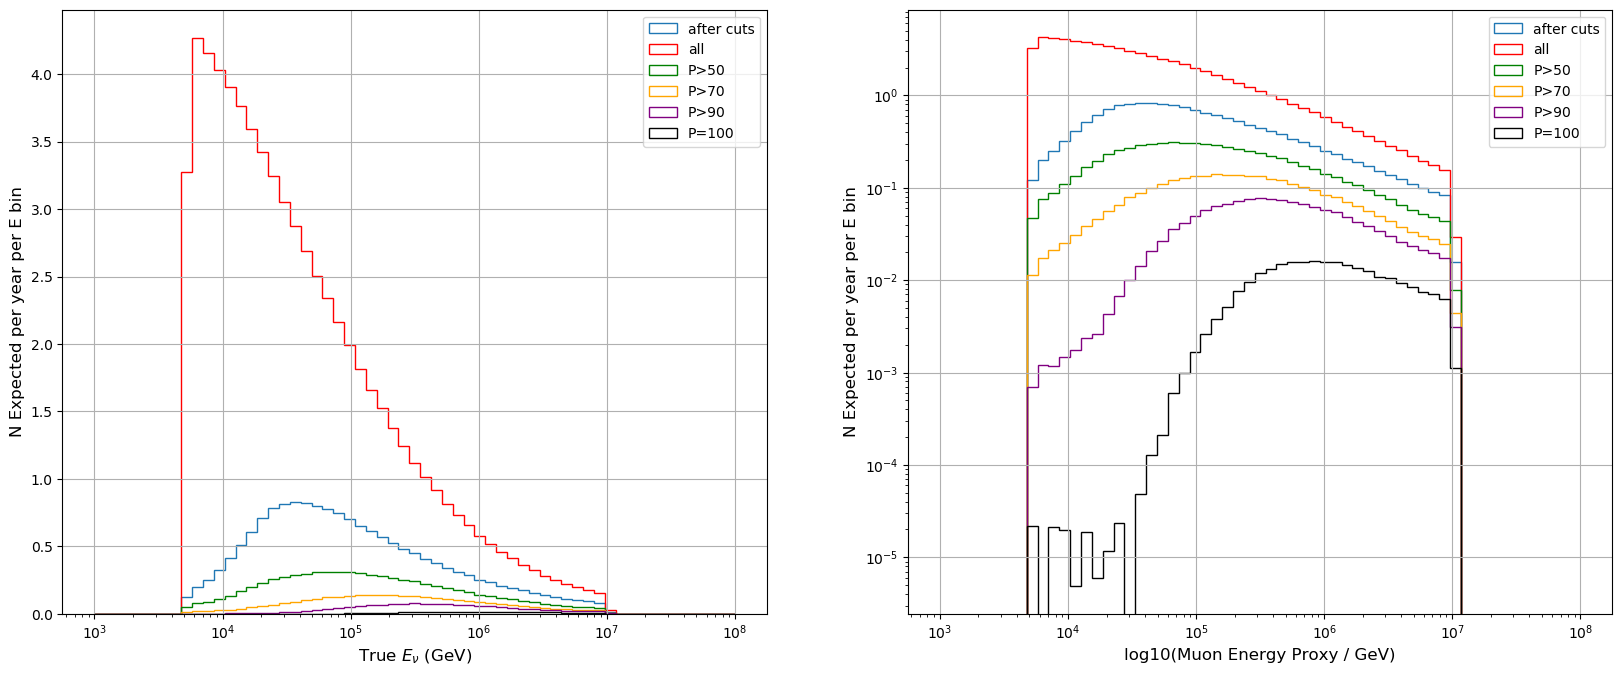

In [29]:
fig = plt.figure(dpi=100, figsize=(20,8))
ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 60)
l3 = plt.hist((data['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights*livetime, histtype='step', label ="after cuts")
l2 = plt.hist((weights['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights*livetime, histtype='step', color = 'r', label = "all")
l4_50 = plt.hist((data['weight'][mask_50]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_50]*livetime, histtype='step', color = 'g', label ="P>50")
l4_70 =plt.hist((data['weight'][mask_70]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_70]*livetime, histtype='step', color = 'orange', label ="P>70")
l4_90 =plt.hist((data['weight'][mask_90]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_90]*livetime, histtype='step', color = 'purple', label ="P>90")
l4_100 =plt.hist((data['weight'][mask_100]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_100]*livetime, histtype='step', color = 'k', label ="P=100")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights*livetime, histtype='step', label ="after cuts")
plt.hist((weights['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights*livetime, histtype='step', color = 'r', label = "all")
plt.hist((data['weight'][mask_50]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_50]*livetime, histtype='step', color = 'g', label ="P>50")
plt.hist((data['weight'][mask_70]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_70]*livetime, histtype='step', color = 'orange', label ="P>70")
plt.hist((data['weight'][mask_90]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_90]*livetime, histtype='step', color = 'purple', label ="P>90")
plt.hist((data['weight'][mask_100]['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights[mask_100]*livetime, histtype='step', color = 'k', label ="P=100")
plt.legend()

plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)

In [30]:
rl3 = [x/y for x, y in zip(l3[0], l2[0])]
rl4_50 = [x/y for x, y in zip(l4_50[0], l2[0])]
rl4_70 = [x/y for x, y in zip(l4_70[0], l2[0])]
rl4_90 = [x/y for x, y in zip(l4_90[0], l2[0])]
rl4_100 = [x/y for x, y in zip(l4_100[0], l2[0])]

/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [31]:
x = []
for i in range(0,len(l2[1])-1):
    x.append((l2[1][i]+l2[1][i+1])/2) 

Text(0.5, 0, 'log10(Muon Energy Proxy / GeV)')

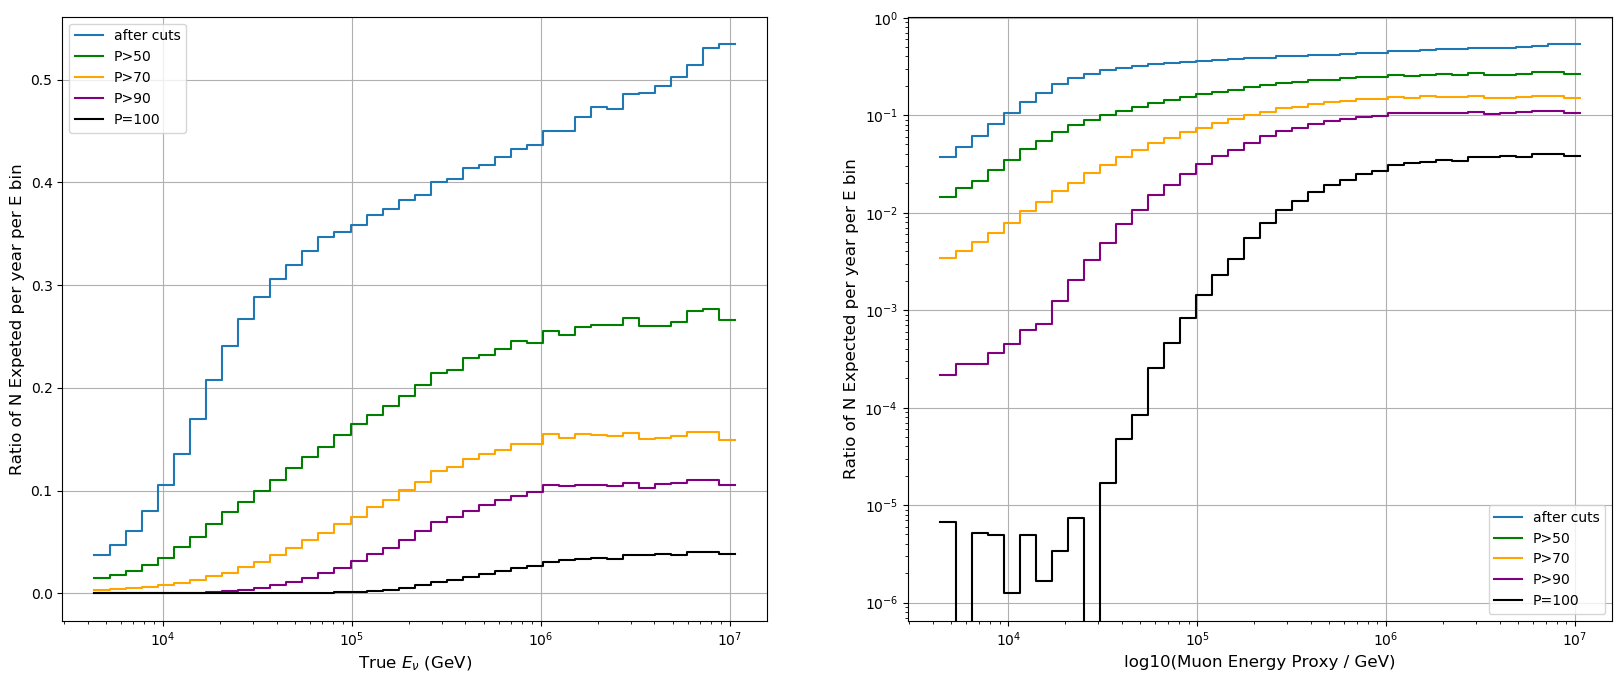

In [32]:
fig = plt.figure(dpi=100, figsize=(20,8))
ax=fig.add_subplot(121)
plt.step(x, rl3, label ="after cuts")
plt.step(x, rl4_50, color = 'g', label ="P>50")
plt.step(x, rl4_70, color = 'orange', label ="P>70")
plt.step(x, rl4_90, color = 'purple', label ="P>90")
plt.step(x, rl4_100, color = 'k', label ="P=100")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.ylabel('Ratio of N Expeted per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)

ax=fig.add_subplot(122)
plt.step(x, rl3, label ="after cuts")
plt.step(x, rl4_50, color = 'g', label ="P>50")
plt.step(x, rl4_70, color = 'orange', label ="P>70")
plt.step(x, rl4_90, color = 'purple', label ="P>90")
plt.step(x, rl4_100, color = 'k', label ="P=100")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Ratio of N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)